# Assignment 2 - Intelligent Machines, Ethics and Law (COMP2400/6400)

### Name: MD AZIZUL HOQUE

### Student Id: 46769579

# Credit Risk Classification

In this assignment, you will implement a **credit risk classification system** as an illustration of *algorithmic decision making*. You will  use Python for implementation, and explore its social implications. This assessment is designed to familiarize you with the process of training a classification model, implementing it using a Python program; and critically examine it from a societal perspective. This assignment will be marked out of 100, and will count towards **40%** of the total unit assessment.

## Credit Risk Dataset Description

The Credit Risk dataset being provided is based on a synthetic dataset publicly available on [Kaggle](https://www.kaggle.com/). It includes various financial attributes to evaluate credit risk. It features 32,581 samples with 11 variables. The key attributes include borrowers' age, employment status, education level, annual income, loan amount, and interest rate. The dataset aims to facilitate the prediction of credit default, that is failure on part of the loan applicant (borrower) to make the loan repayments.

## Setup

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Task 0 - (0 Marks)

Load the dataset using Python. 

Preprocess the dataset. 			

In [5]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
#Load the dataset
df = pd.read_csv('credit_risk_dataset_v3.csv')

In [7]:
#Show first few rows of the dataset
#print(df.head())
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [8]:
#Size of the dataset
print("Size of the dataset: ", df.shape)
print("=================================")

Size of the dataset:  (32581, 11)


In [9]:
#Check if data has null value
print("Null information:")
print("variable \t number of null values")
print(df.isnull().sum())

Null information:
variable 	 number of null values
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [10]:
#remove null data points from the dataset
#axis=0 drop rows which contain missing values
df = df.dropna(axis=0)
print("========================")
print("Null rows removed. \n")

Null rows removed. 



In [11]:
#check if data has null values
print("Updated null information:")
print("Variable \t number of null values")
print(df.isnull().sum())
print("=========================================")
print("Updated size of the dataset:", df.shape)

Updated null information:
Variable 	 number of null values
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
Updated size of the dataset: (28638, 11)


loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64


<Axes: xlabel='loan_intent'>

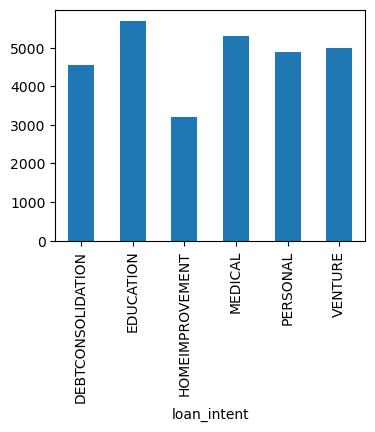

In [12]:
# Show distribution of the categorical variable 'loan_intent'
print (df['loan_intent'].value_counts())

# Visualize the information
GroupedData=df.groupby('loan_intent').size()
GroupedData.plot(kind='bar', figsize=(4,3))

person_income
60000     924
30000     729
50000     677
40000     585
45000     535
         ... 
99200       1
99473       1
47230       1
99670       1
720000      1
Name: count, Length: 3835, dtype: int64


<Axes: >

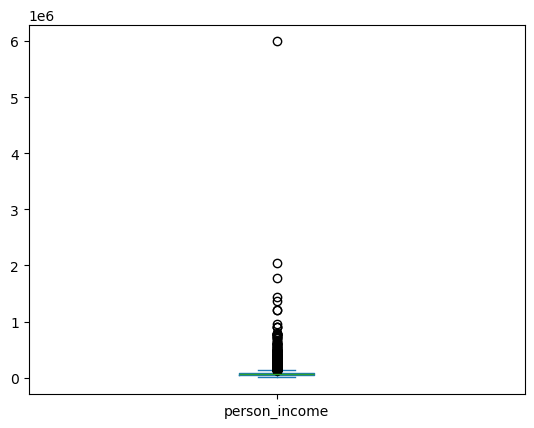

In [13]:
# Show distribution of the numerical variable 'person_income'
print (df['person_income'].value_counts())

# Visualize the information
# A box plot is a method for graphically depicting groups of numerical data through their quartiles.
df['person_income'].plot.box()


In [14]:
# From the visualization, we notice that 'person_income' has skewness, and log transform can fix the skewness.
df['person_income'] = np.log(df['person_income'])

In [15]:
# Some variables, such as 'person_home_ownership' and 'loan_intent', are categorical.
# Others, such as 'person_age' and 'person_income', are numerical.
# We need to convert categorical variables to numeric before we can use the data for our Machine Learnining models.

# identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

# Convert categorical variable into dummy/indicator variables.
# Each n-valued variable is converted to n Boolean variables, with 0 indicating FALSE and 1 indicating TRUE. 

df = pd.get_dummies(df, columns = cat_columns, dtype=int)

# For example, 'loan_intent' with values EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION and HOMEIMPROVEMENT  
# are now converted to 6 dummy columns: loan_intent_EDUCATION, loan_intent_MEDICAL, ..., loan_intent_HOMEIMPROVEMENT, each taking 0/1 as possible values.
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,10.985293,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,21,9.169518,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,25,9.169518,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,11.089805,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,10.904119,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1


<Axes: ylabel='count'>

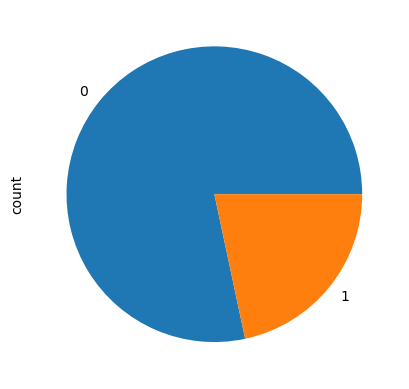

In [16]:
# 'loan_status' indicates if the loan was defaulted (1) or repayed on time (0). 
# This is what we would like to predict based on the dataset.
# Let's visualize it. 
df["loan_status"].value_counts().plot.pie()

# Resample

From the visualization above, we can see that substantially more number of loans were paid on time than defaulted. 

This imbalanced dataset is problematic for training a model. 

To handle imbalanced dataset, we can either under-sample the majority class or over-sample the minority class.

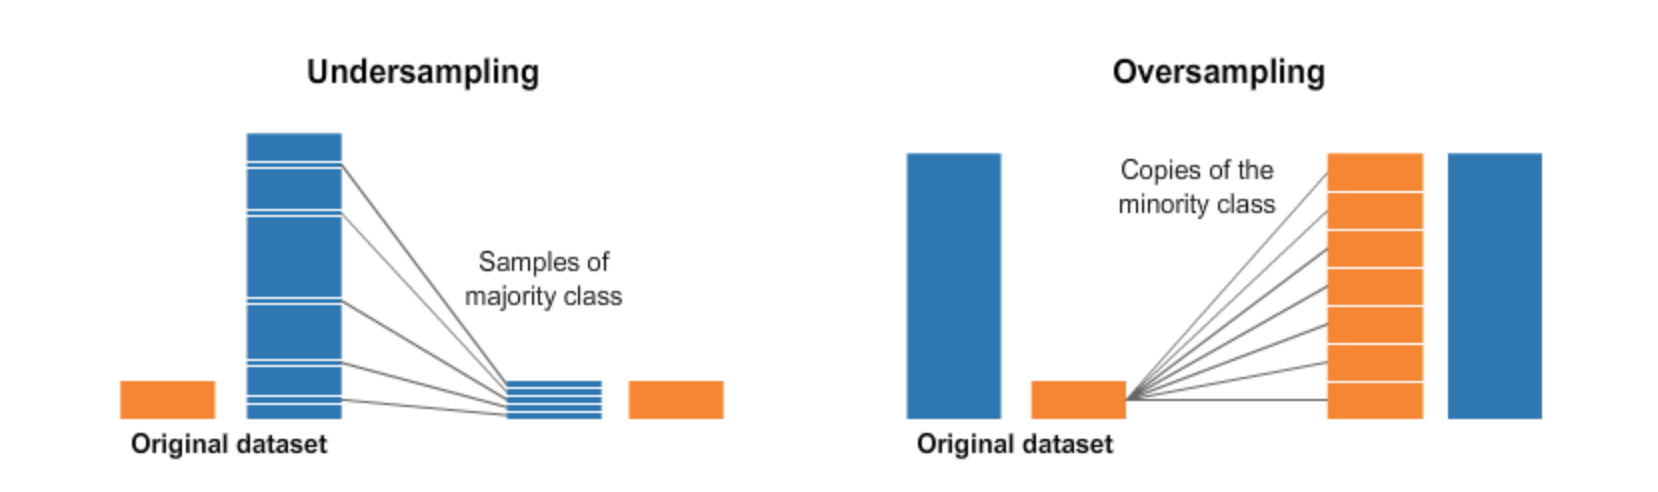

Random under-sampling:
loan_status
0    6203
1    6203
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

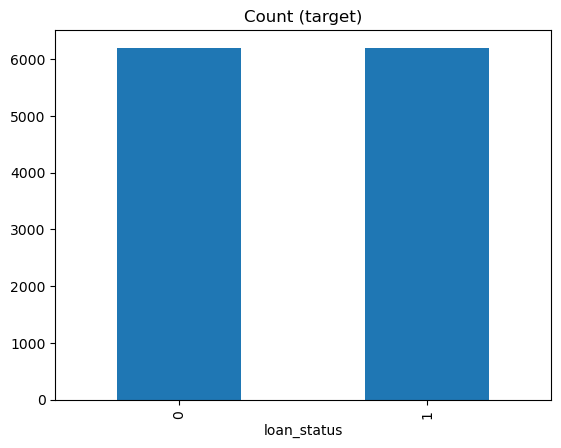

In [17]:
# Under sample
count_class_0, count_class_1 = df["loan_status"].value_counts()

# Divide by class
df_class_0 = df[df["loan_status"] == 0]
df_class_1 = df[df["loan_status"] == 1]

# df_under is the updated under-sampled data frame
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under["loan_status"].value_counts())

df_under["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

Random over-sampling:
loan_status
0    22435
1    22435
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

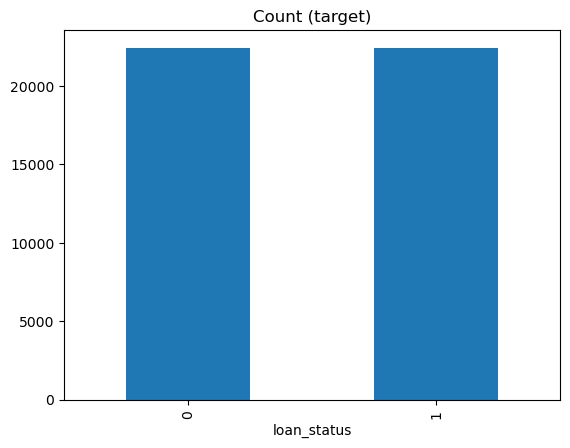

In [18]:
# Over sample 
# df_over is the updated over-sampled data frame
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over["loan_status"].value_counts())

df_over["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

In [19]:
# In this assignment, we choose over-sample techniques.
# Now we split our dataset into input X and target value Y.

# Drop the labels from the data frame.
drop_df_over = df_over.drop(['loan_status'],axis=1)
X = drop_df_over.values

# Get the labels separately
y = df_over['loan_status'].values

# Now we split the data into training dataset and test dataset. 
# We use 80% of the data for Training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now we standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X.shape

(44870, 19)

## Task 1: Data Visualisation - (10 marks)

Visualize some (at least two) other variables in the **over-sampled dataset**. 
Note that column names have changed after we convert categorical variable into dummy/indicator variables.

In [20]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
df_over.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

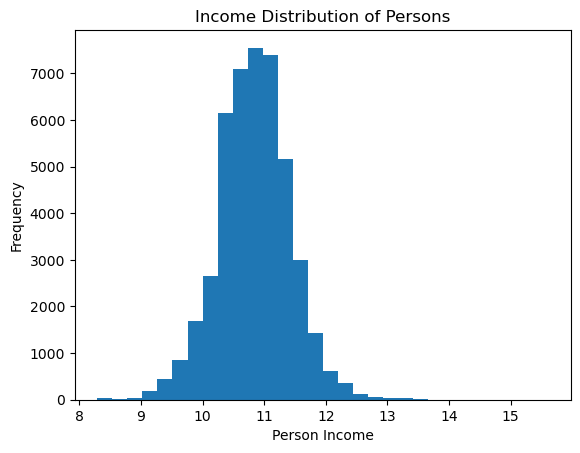

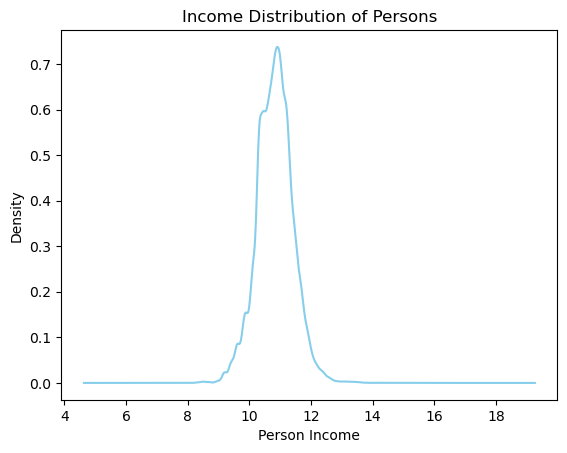

In [22]:
#Distribution of person income
df_over['person_income'].plot(kind='hist', bins=30, title='Income Distribution of Persons')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.show()

df_over['person_income'].plot(kind='kde', color='skyblue', title='Income Distribution of Persons')
plt.xlabel('Person Income')
plt.ylabel('Density')
plt.show()

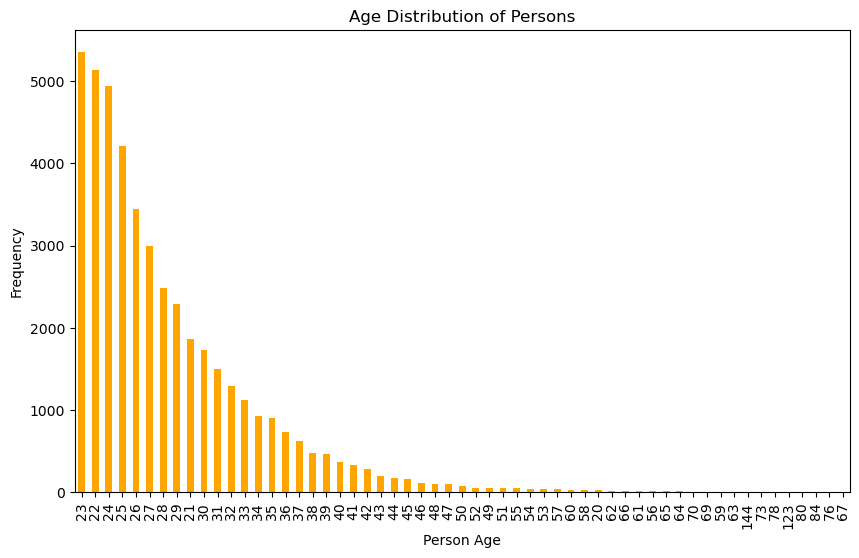

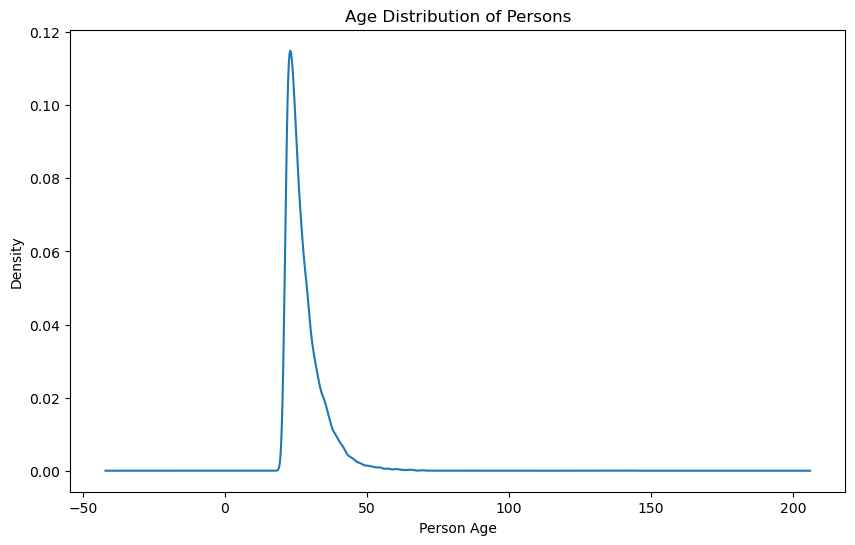

In [23]:
#Distribution of person age
plt.figure(figsize=(10, 6))
df_over['person_age'].value_counts().plot(kind='bar', color='orange', title='Age Distribution of Persons')
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df_over['person_age'].plot(kind='kde', title='Age Distribution of Persons')
plt.xlabel('Person Age')
plt.ylabel('Density')
plt.show()

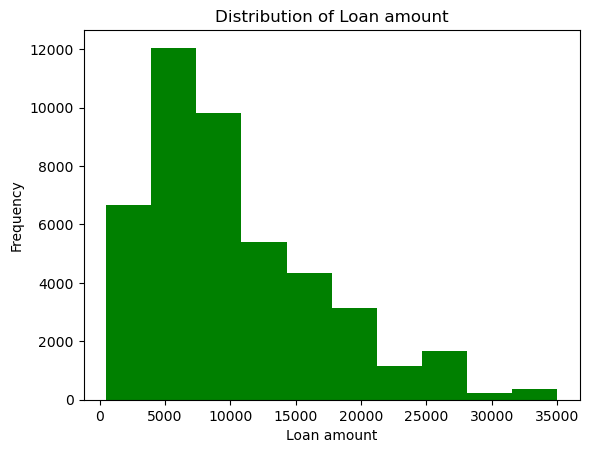

In [24]:
#Distribution of loan amount
df_over['loan_amnt'].plot(kind='hist', color='green' ,title='Distribution of Loan amount')
plt.xlabel('Loan amount')
plt.ylabel('Frequency')
plt.show()

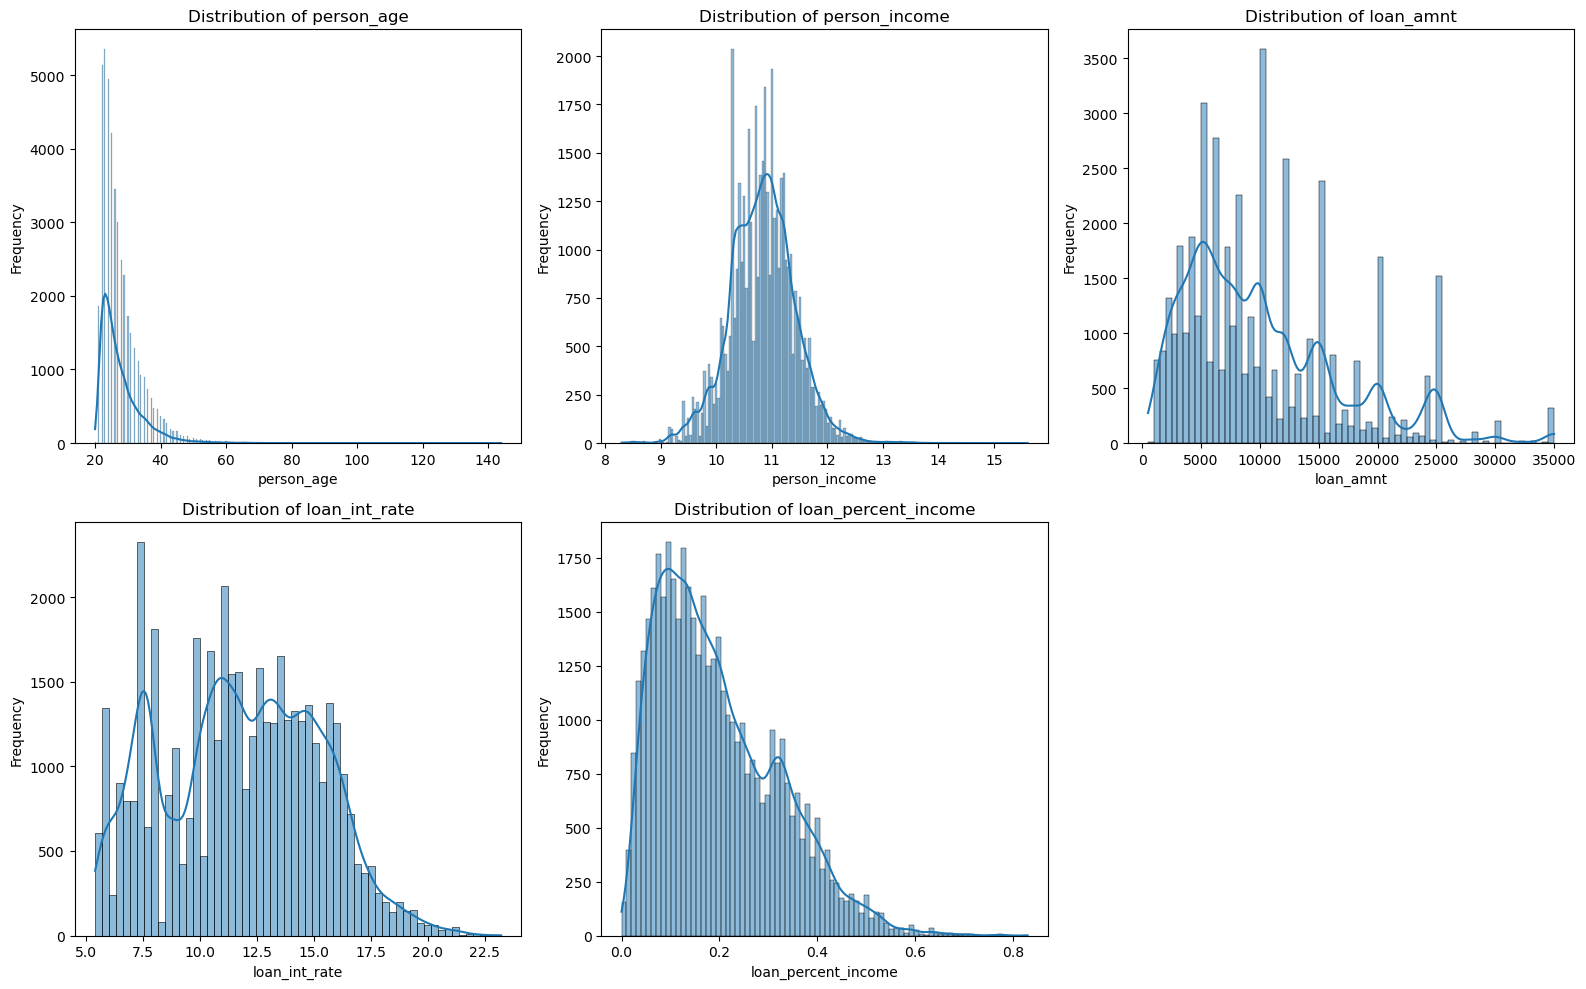

In [25]:
# List of continuous variables
continuous_vars = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Adjusting the figure size
plt.figure(figsize=(16, 10))

# Looping through the variables to create histograms with KDE
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i + 1)  # Creating a 2x3 grid of subplots
    sns.histplot(df_over[var].dropna(), kde=True)  # Using df_over and adding KDE
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()

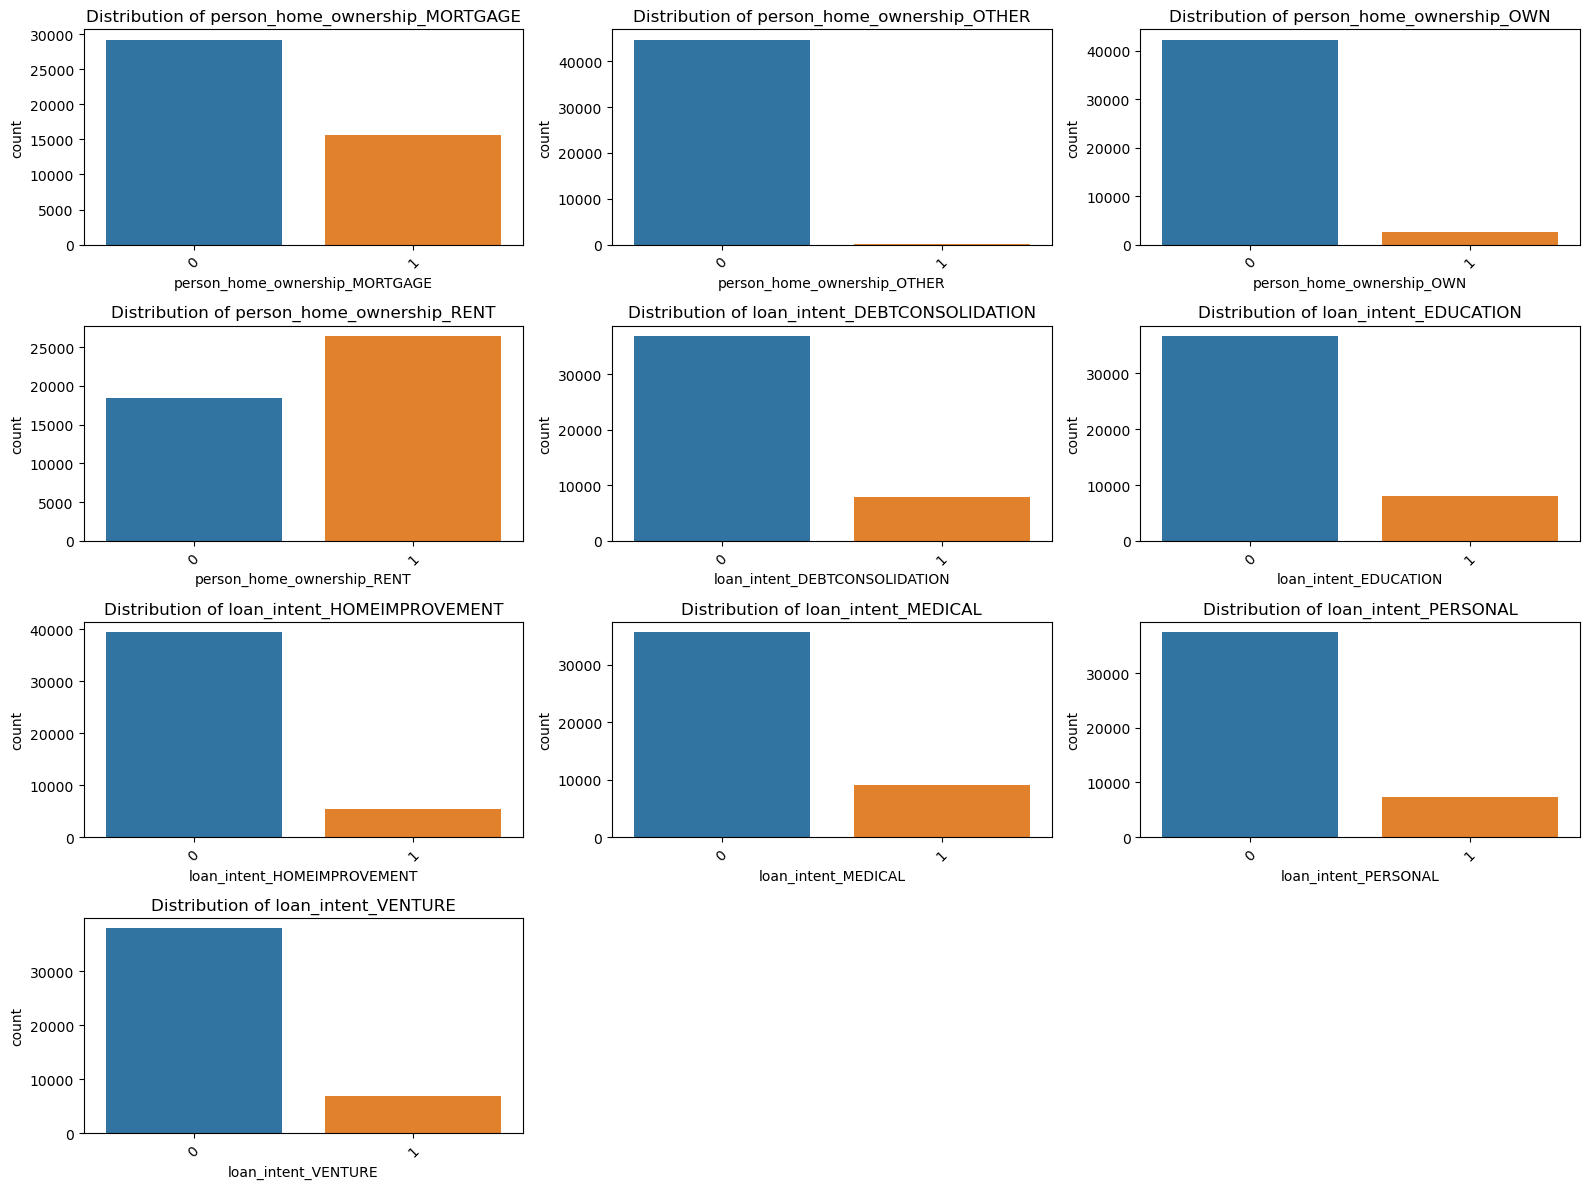

In [26]:
# List of categorical variables
categorical_vars = [
    'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
    'person_home_ownership_OWN', 'person_home_ownership_RENT',
    'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
    'loan_intent_PERSONAL', 'loan_intent_VENTURE'
]

# Adjusting the figure size
plt.figure(figsize=(16, 12))

# Looping through the variables to create count plots
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 3, i + 1)  # Creating a 4x3 grid of subplots
    sns.countplot(x=var, data=df_over)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


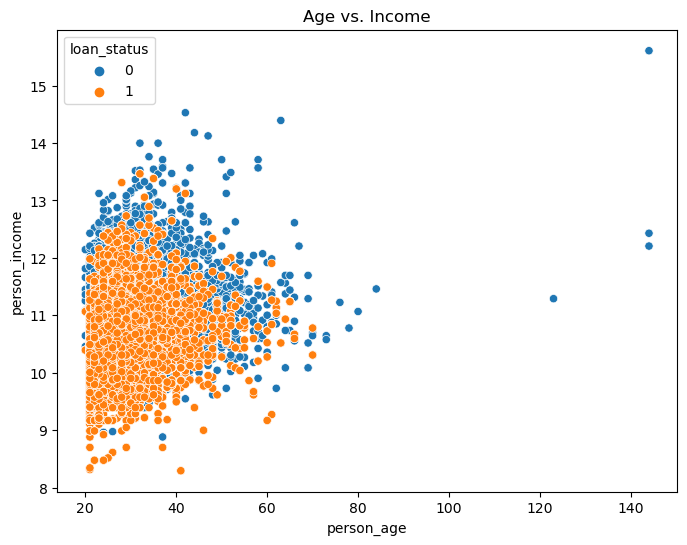

In [27]:
# Relationship between age and income
plt.figure(figsize=(8, 6))
sns.scatterplot(x= df_over['person_age'], y=df_over['person_income'], data=df, hue=df_over['loan_status'])
plt.title('Age vs. Income')
plt.show()

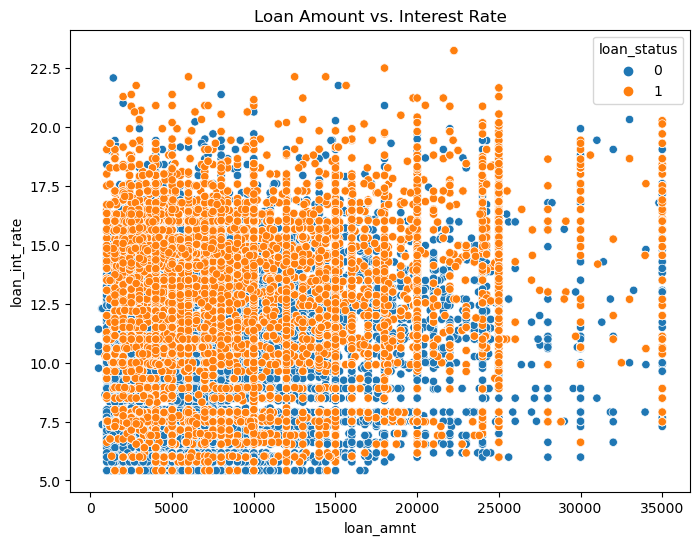

In [28]:
# Relationship between loan amount and interest rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_over['loan_amnt'], y=df_over['loan_int_rate'], data=df, hue=df_over['loan_status'])
plt.title('Loan Amount vs. Interest Rate')
plt.show()

## Task 2: Training a Traditional Machine Learning Model	- (25 Marks)

Train a machine learning model for predicting loan default with a machine learning algorithm discussed during the lectures **(Week 10 to Week 12)** (or any other appropriate algorithm not covered in the lectures). Which machine learning algorithm did you choose, and why? What is the accuracy of the model on the test set?

# Logistic Regression

In [29]:
#importing libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [30]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35896, 19), (35896,), (8974, 19), (8974,))

In [31]:
#importing roc_curve and roc_auc_score from sklearn library
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
# Build the Logistic Regression model
model = linear_model.LogisticRegression()
#train model
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Do predictions on test set
pred_test = model.predict(X_test)

In [34]:
# Evaluate the performance of your trained model
#Calculating accuracy score
lgc_accuracy = accuracy_score(y_test, pred_test)
print('Accuracy of test data is : ',lgc_accuracy)

Accuracy of test data is :  0.7804769333630488


In [35]:
#Calculating and printing confusion matrix
print('confusion matrix: \n', confusion_matrix(y_test, pred_test))

confusion matrix: 
 [[3472 1046]
 [ 924 3532]]


In [36]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

In [37]:
# Calculate AUC
auc = roc_auc_score(y_test, pred_test)

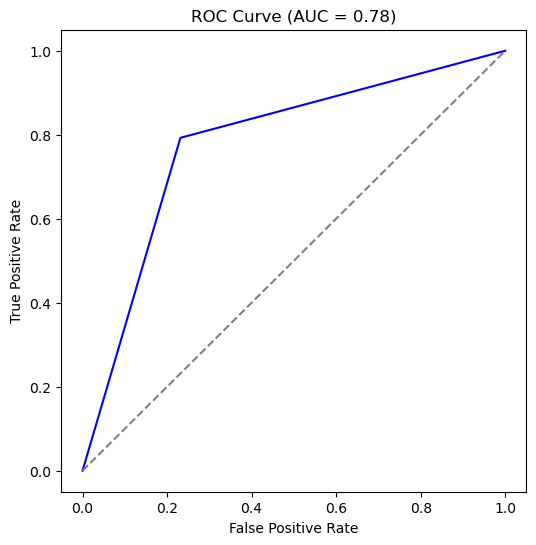

AUC: 0.78


In [38]:
# Plot the ROC curve (optional)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()

print(f'AUC: {auc:.2f}')

# Feature Selection

## Recursive Feature Estimation(RFE)¶

In [39]:
#importing libraries
from sklearn.feature_selection import RFE

In [40]:
#Build the RFE model
rfe_model = linear_model.LogisticRegression()

In [41]:
#Adjusting number of features
rfe = RFE(estimator= rfe_model, n_features_to_select= 6, step = 1)

In [42]:
#train the model
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=6)

In [43]:
#shows which feature rfe selects
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False])

In [44]:
#Displays ranking of features
rfe.ranking_

array([ 9,  1, 11, 12,  1,  1, 14,  5, 13,  1,  1,  2,  6,  1,  3,  8,  4,
       10,  7])

In [45]:
#Doing prediction on the test
predicted_rfe = rfe.predict(X_test)

In [46]:
#Calculating accuracy score using method
rfe_accuracy = accuracy_score(y_test, predicted_rfe)

In [47]:
#Printing accuracy score
print('The accuracy is: ', rfe_accuracy)

The accuracy is:  0.7760196122130599


In [48]:
#Calculating and printing confusion matrix
print('RFE confusion matrix: \n', confusion_matrix(y_test, predicted_rfe))

RFE confusion matrix: 
 [[3466 1052]
 [ 958 3498]]


In [49]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_rfe)

In [50]:
# Calculate AUC
auc = roc_auc_score(y_test, predicted_rfe)
print('AUC :', auc)

AUC : 0.7760812922258702


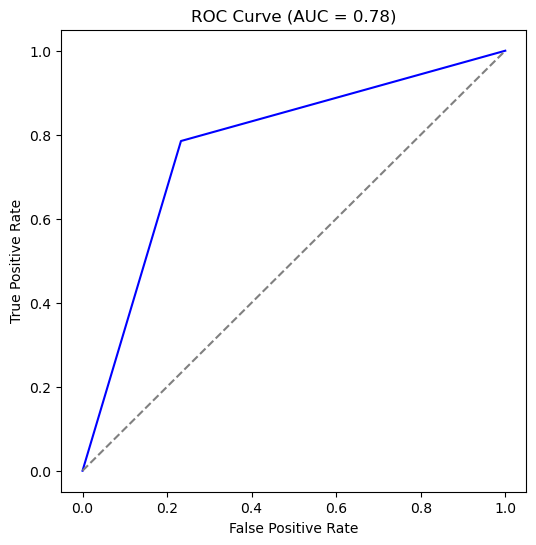

AUC: 0.78


In [51]:
# Plot the ROC curve (optional)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()

print(f'AUC: {auc:.2f}')

# KNN

In [52]:
#importing library for KNN
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Define the model: Init K-NN
knn = KNeighborsClassifier(n_neighbors=3, p=2,metric='euclidean')

In [54]:
# Fit Model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [55]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [56]:
# Evaluate Model
knn_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy_score : ',knn_accuracy)
print('f1_score : ',f1)

cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :\n',cm)

Accuracy_score :  0.8892355694227769
f1_score :  0.8937580162462591
Confusion Matrix :
 [[3799  719]
 [ 275 4181]]


## Selecting K value = 5 for KNN Classifier

In [57]:
# Define the model: Init K-NN
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='euclidean')

In [58]:
# Fit Model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [59]:
# Evaluate Model
print('Accuracy_score : ',accuracy_score(y_test, y_pred))
print('f1_score : ',f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :\n',cm)

Accuracy_score :  0.8892355694227769
f1_score :  0.8937580162462591
Confusion Matrix :
 [[3799  719]
 [ 275 4181]]


## GridSearchCV

In [60]:
#importing GridSerarchCV and KFlod from sklearn
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {"n_neighbors": range(1, 50)}
cv = KFold(n_splits=10, shuffle=True)
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 
                         'cv':cv})

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'cv': KFold(n_splits=10, random_state=None, shuffle=True),
                         'n_neighbors': range(1, 50)})

In [62]:
gridsearch.best_params_

{'n_neighbors': 1}

In [63]:
#determining accuracy score
best_accuracy=gridsearch.best_score_

In [64]:
print('The best value of K: ', gridsearch.best_params_['n_neighbors'])
print('The accuracy is: ', best_accuracy)

The best value of K:  1
The accuracy is:  0.9236403918733881


**Evaluation of KNN**

In KNN classifier model,
when k=3 it gives accuracy of 0.8892355694227769

when k=5 it gives accuracy of 0.8892355694227769

We applied GridSearchCV method to find the best k value and  we found 1

when k-1 it gives accuracy of **0.9236403918733881**

And it is the highest accuracy among built KNN models.

# RandomForestClassifier

In [65]:
#importing libraries for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [66]:
# Initialize the Random Forest model
RFC_model = RandomForestClassifier(n_estimators=300, random_state=42)

In [67]:
# Perform 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
# Cross-validated metrics
accuracy_scores = cross_val_score(RFC_model, X_train, y_train, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(RFC_model, X_train, y_train, cv=kf, scoring='precision')
recall_scores = cross_val_score(RFC_model, X_train, y_train, cv=kf, scoring='recall')
f1_scores = cross_val_score(RFC_model, X_train, y_train, cv=kf, scoring='f1')
roc_auc_scores = cross_val_score(RFC_model, X_train, y_train, cv=kf, scoring='roc_auc')

In [69]:
# Display cross-validation results
print('Cross-Validation Results:')
print(f'Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}')
print(f'Precision: {precision_scores.mean():.4f} ± {precision_scores.std():.4f}')
print(f'Recall: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}')
print(f'F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}')
print(f'AUC-ROC: {roc_auc_scores.mean():.4f} ± {roc_auc_scores.std():.4f}')

Cross-Validation Results:
Accuracy: 0.9684 ± 0.0020
Precision: 0.9641 ± 0.0033
Recall: 0.9731 ± 0.0026
F1 Score: 0.9686 ± 0.0019
AUC-ROC: 0.9920 ± 0.0011


In [70]:
# Train the model on the entire training set
RFC_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [71]:
# Predict on the test set
y_pred = RFC_model.predict(X_test)
y_pred_proba = RFC_model.predict_proba(X_test)[:, 1]

In [72]:
# Evaluate the model on the test set
r_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('\nTest Set Results:')
print(f'Accuracy: {r_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')


Test Set Results:
Accuracy: 0.9809
Precision: 0.9781
Recall: 0.9836
F1 Score: 0.9809
AUC-ROC: 0.9954


Confusion Matrix :
 [[4420   98]
 [  73 4383]]


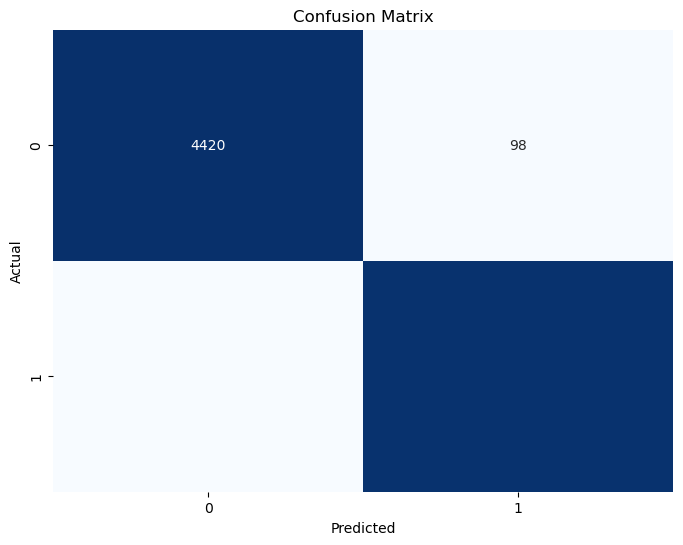

In [73]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :\n',conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

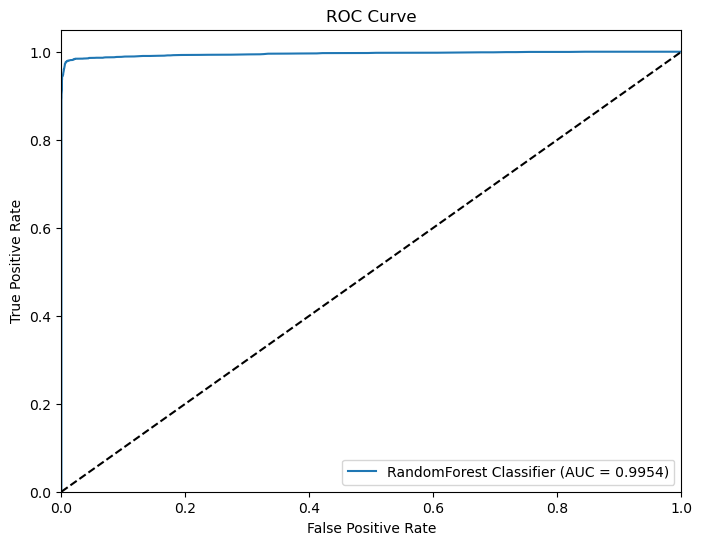

In [74]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='RandomForest Classifier (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

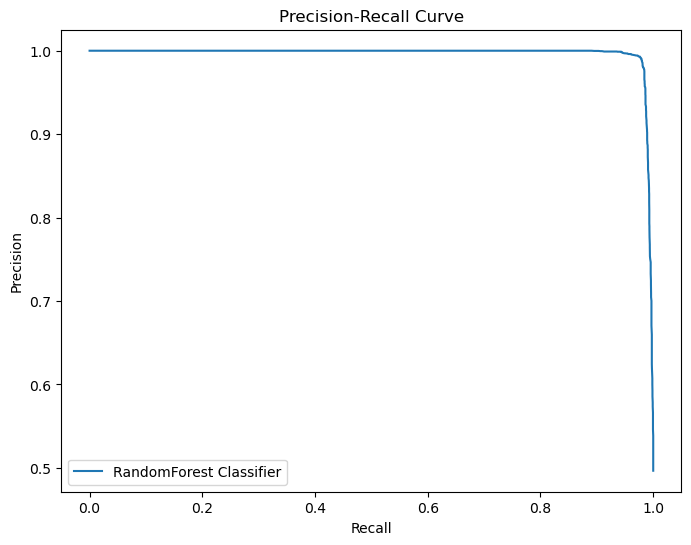

In [75]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='RandomForest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

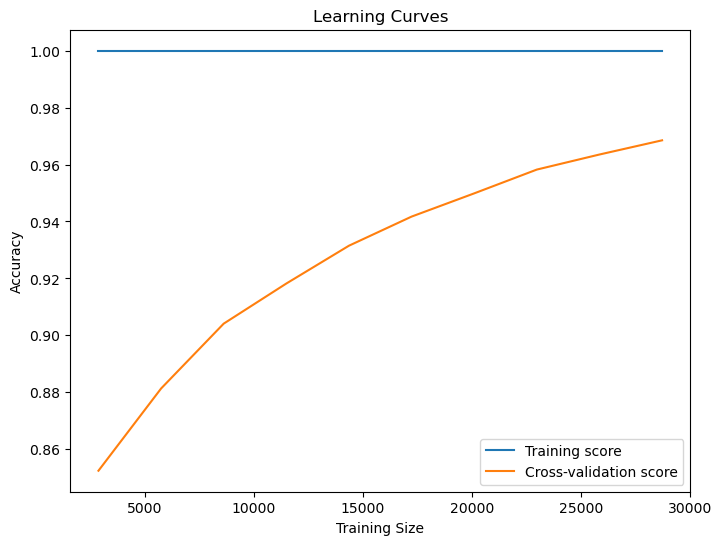

In [76]:
# Plot learning curves
train_sizes, train_scores, val_scores = learning_curve(RFC_model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

# Model accuracy Comparison

In [77]:
# initialize data of lists. 
data = {
        
        'Logistic': [lgc_accuracy],
        'RFE': [rfe_accuracy],
        'KNN': [best_accuracy],
        'RandomForest': [r_accuracy],
} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data) 
  
# printing dataframe
df 

,Logistic,RFE,KNN,RandomForest
0,0.780477,0.77602,0.92364,0.980945


**I have learnt logistic and KNN in this unit tutorial. I also applied my knowledge what I have learnt in COMP2200 Data Science. I tried to figure out which model works best for the provided dataset and from the above analysis I can say that Random Forest Classifier model outperform the others with the accuracy score 0.980945.**

## Task 3: Training a Neural Network-based Model - (25 Marks)

Train an artificial neural network (Multi-Layered Perceptron Classifier (MLP)) model for loan default prediction. What is the accuracy of the model on the test set?

In [78]:
# importing libraries
from sklearn.neural_network import MLPClassifier

In [79]:
# Initialize and train the MLPClassifier
mlp_model = MLPClassifier()

In [80]:
#Train the model
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [81]:
# Predict on the test set
y_pred = mlp_model.predict(X_test)

In [82]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)

print('\nTest Set Results:')
print(f'Accuracy: {accuracy:.4f}')


Test Set Results:
Accuracy: 0.8642


In [83]:
# Printing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :\n',conf_matrix)

Confusion Matrix :
 [[4070  448]
 [ 771 3685]]


In [84]:
#Showing how does changing the number of hidden layers in an MLP classifier affect the accuracy of the model
for num_layers in range(1, 6):
    mlp = MLPClassifier(hidden_layer_sizes=(100,) * num_layers)

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Hidden Layers: {num_layers}, Accuracy: {accuracy}")

Number of Hidden Layers: 1, Accuracy: 0.8587029195453533
Number of Hidden Layers: 2, Accuracy: 0.9097392467127257
Number of Hidden Layers: 3, Accuracy: 0.9389347002451527
Number of Hidden Layers: 4, Accuracy: 0.9275685313126811
Number of Hidden Layers: 5, Accuracy: 0.9375975039001561


In [85]:
#Showing how does changing the number of neurons in each hidden layer in an MLP classifier affect the accuracy of the model
for num_neurons in range(50, 201, 50):
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,))

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Neurons per Hidden Layer: {num_neurons}, Accuracy: {accuracy}")

Number of Neurons per Hidden Layer: 50, Accuracy: 0.8600401158903499
Number of Neurons per Hidden Layer: 100, Accuracy: 0.8648317361265879
Number of Neurons per Hidden Layer: 150, Accuracy: 0.8714062848228215
Number of Neurons per Hidden Layer: 200, Accuracy: 0.8726320481390685


In [86]:
#Showing how does changing the activation function used in an MLP classifier affect the accuracy of the model 
# Create a multi-layer perceptron classifier with varying activation functions
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
for func in activation_functions:
    mlp = MLPClassifier(activation=func)

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Activation Function: {func}, Accuracy: {accuracy}")

Activation Function: identity, Accuracy: 0.7814798306217963
Activation Function: logistic, Accuracy: 0.8532427011366169
Activation Function: tanh, Accuracy: 0.8642745709828393
Activation Function: relu, Accuracy: 0.8607087140628482


**The accuracy of the MLP model is 0.8642 however I showed that changes in the number of hidden layer, number of neorons and activation funtion affect on the model accuracy.** 

## Task 4: Model Explainability - (20 Marks)

SHAP importance is calculated on row level and can be used to understand what is important to a specific row. The values represent how a feature influences the prediction of a single row relative to the average outcome in the dataset.

It can be used to:

1. Understand which features most influence the predicted outcome.
2. Dive into a feature and understand how the different values of that feature affect the prediction.
3. Understand what is most influential on individual rows or subsets within the data.

In this task, you are expected to use SHAP (SHapley Additive exPlanations) to understand the model.

Get the SHAP importance for your traditional machine learning model (Task 2  above) using the **shap** library. 

**Make sure you provide the visualisation of shap values**

Based on the visualization, can you explain how each feature is contributing to the final prediction of loan default? Does your explaination align with business sense?

In [ ]:
# use SHAP (SHapley Additive exPlanations) to understand the model 
#importing shap library
import shap

#explainer for randomforest 
explainer = shap.TreeExplainer(RFC_model, X_train)
# Calculate SHAP values with additivity check disabled
shap_values = explainer.shap_values(X_test, check_additivity=False)
#SHAP summary plot
shap.summary_plot(shap_values[1], X_test, feature_names=drop_df_over.columns)

# SHAP dependence plot for a specific feature
shap.dependence_plot("loan_int_rate", shap_values.shap_values[1], X_test, feature_names=drop_df_over.columns)


 20%|====                | 3528/17948 [12:22<50:32]       

***Your analysis and dicussion will go here*** 

The loan percentage of income, interest rate, personal income, home ownership status, loan amount, employment length, loan intent, age, and credit history are all important factors in determining default risk. High loan percentages, high interest rates, lower personal income, renting status, and short employment length are intuitive indicators of higher default risk. High-interest rates are strongly associated with higher default risks, and assessing interest rate sensitivity can help balance profitability with default risk. Higher income levels decrease the probability of default, and income verification is crucial in the loan approval process. Homeownership status increases the likelihood of default compared to renters, while larger loan amounts slightly increase default risk. Longer employment tenure reduces default risk, and loan intent can signal underlying financial behavior. Age correlates with financial maturity and stability, making older borrowers less risky. Longer credit histories provide more data on the borrower's financial behavior, enhancing the accuracy of risk assessment. These factors align with business sense, enhancing trust in the model's predictions and aiding in better decision-making for loan approvals and risk management.

## Task 5: Social Implications - (20 Marks)

This task involves exploration of the social implications of algorithmic decision making in the context of credit risk prediction. In particular you will be looking at bias and discrimination. As a preparation, read the MIT Technology Review article *Bias isn’t the only problem with credit scores—and no, AI can’t help* available as: https://www.technologyreview.com/2021/06/17/1026519/racial-bias-noisy-data-credit-scores-mortgage-loans-fairness-machine-learning/
1. **(5 marks)** Summarize the above reading in about 200 words. 
2. **(5 marks)** Elaborate and explain in about 100 words the following sentence from this reading: "Incomplete data is troubling because detecting it will require researchers to have a fairly nuanced understanding of societal inequities".
3. **(10 marks)** In the context of the admittedly synthetic credit risk dataset you examined in this assignment, did you notice any possible issue of fairness and discrimination? Describe what steps you would recommend for alleviating such bias in the intended classification model.

1.
Researchers Laura Blattner and Scott Nelson have found that automated decision-making in credit scoring often disadvantages low-income and minority groups due to biased data and algorithms. They discovered that these groups have less data in their credit histories, leading to less precise predictions and perpetuating inequality. Their study used credit reports of 50 million anonymized US consumers and found that credit scores are both biased and noisy, resulting in inaccurate predictions that cannot be fixed by simply improving algorithms. They found that inaccuracies in credit scoring stem more from noise than bias, and that loans are often given to the wrong people, creating a cycle where certain groups never accumulate the data needed to secure future loans. They found that if decisions for minority and low-income applicants were as accurate as those for wealthier white applicants, disparities would reduce by 50%. Addressing these inaccuracies benefits both lenders and underserved applicants.The government should encourage lenders to offer loans to minority applicants, enhancing their credit histories. However, communicating this value to business executives is challenging. Credit scores should be supplemented with additional data, such as bank transactions. Policymakers should also address societal inequities and the complexity of data, acknowledging that technology alone cannot provide all solutions.


2.
The complex link between incomplete data and societal injustices makes incomplete data a major difficulty in automated decision-making processes. It frequently reflects institutionalized prejudice and biases, sustaining cycles of adversity. To properly recognize and handle missing data, researchers need to comprehend the historical, social, and economic elements that have contributed to these discrepancies. In order to address inadequate data, one must navigate intricate webs of complexity and understand how biases such as socioeconomic inequality and racial discrimination intersect with data collection procedures. It is imperative to tackle institutional behaviors and policies that exacerbate disparities. Therefore, creating plans for advancing justice and equity in automated decision-making systems necessitates a thorough comprehension of societal injustices.

3.
In order to handle potential fairness and discrimination issues I noticed that, credit risk models need to be carefully considered. Biases in the training data may be inadvertently reinforced or amplified by machine learning models, which could result in the unfair treatment of some groups. These problems include-
* Biased input data
* Feature selection
* Model performance disparities

To mitigate bias, data preprocessing should ensure fair representation of all demographic groups, using statistical methods to detect and measure bias. Feature engineering should exclude sensitive attributes, such as race or gender, to prevent direct discrimination. Fair feature selection should use techniques like disparate impact analysis to ensure selected features do not disproportionately affect certain groups.

Algorithm selection should be fair, choosing algorithms known for their fairness properties. Cross-group performance evaluation should evaluate model performance across different demographic groups to ensure fairness. Bias mitigation techniques should be implemented during training, such as reweighting, adversarial debiasing, or fairness constraints. Regular validation on new data is necessary to maintain fairness over time. Post-processing should adjust decision thresholds to ensure fair outcomes for different groups, balancing false positive and false negative rates. Continuous audits should be conducted to detect and address any emerging biases.

In conclusion, ensuring fairness and reducing discrimination in credit risk models requires a multi-faceted approach. By carefully preprocessing data, selecting appropriate features, choosing fair algorithms, and continuously monitoring model performance, models can make fairer and more equitable predictions. Addressing these issues is not only ethically important but also helps maintain trust and compliance with regulatory standards.